In [1]:
import numpy as np, matplotlib.pyplot as plt
from glob import glob

%matplotlib inline

In [2]:
data_dir = '../data/1_25_18/Q1UW03/UT180126/'

heii_names = np.unique([filename.split('/')[-1].split('.')[0] for filename in 
                        glob(data_dir+'heii*.spec')])

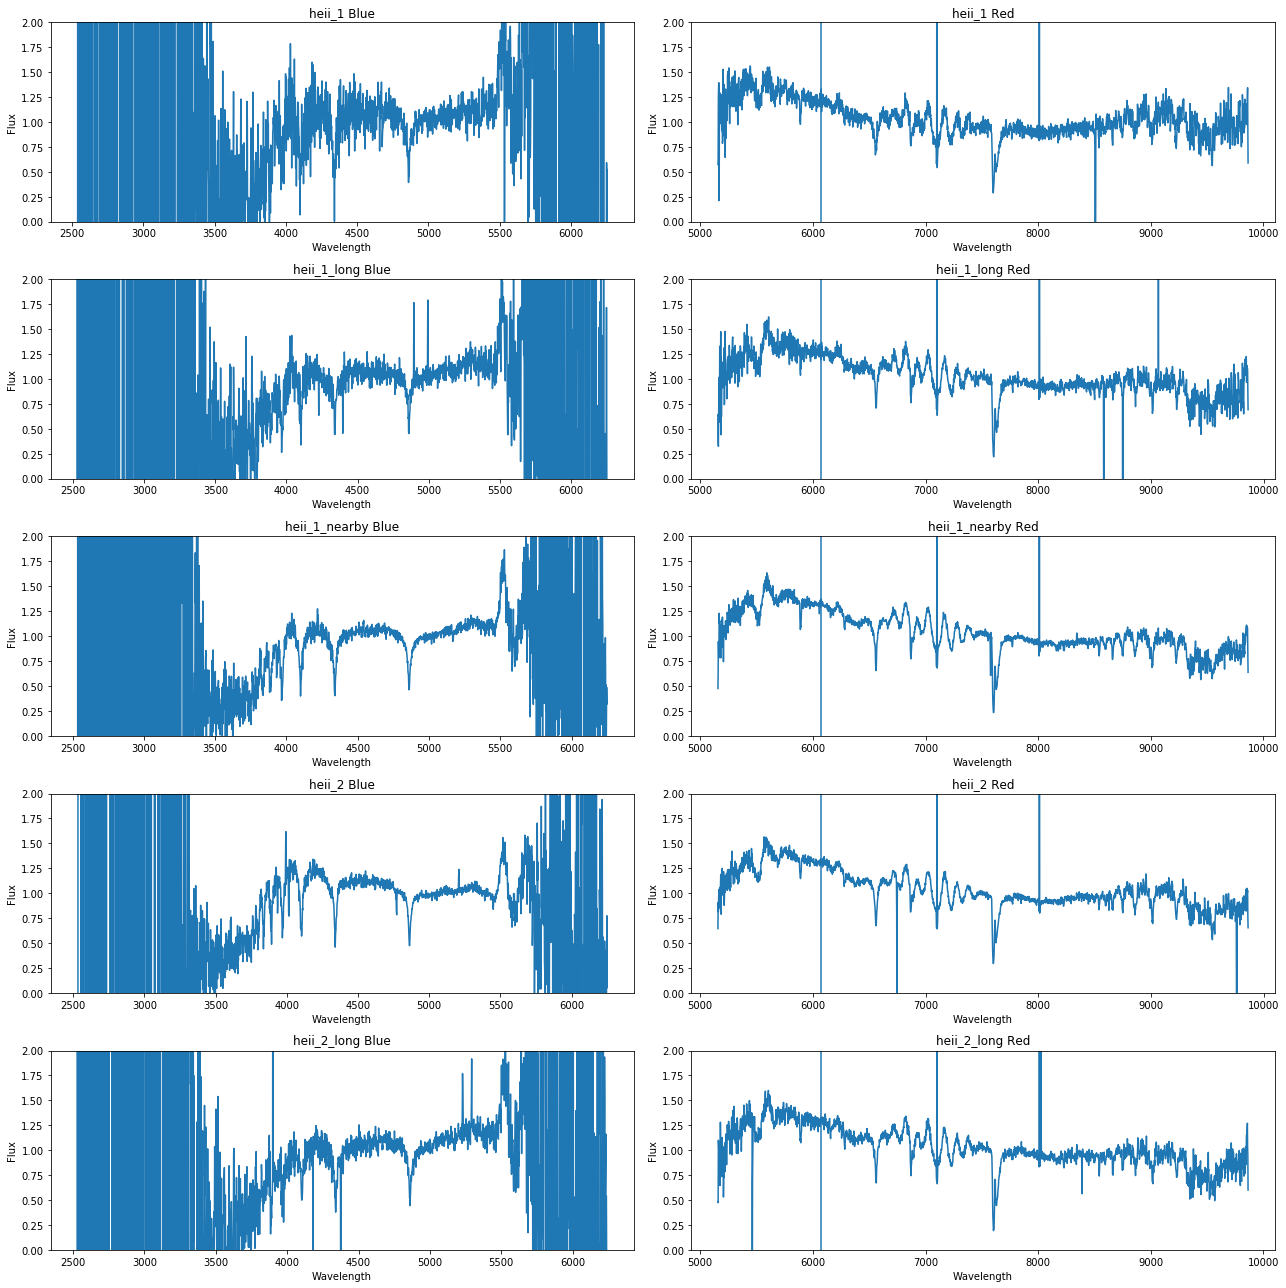

In [9]:
fig, axes = plt.subplots(len(heii_names),2,figsize=(18,18))

for i,name in enumerate(heii_names):
    bspecs = glob(data_dir+name+'.*b.fits.spec')
    rspecs = glob(data_dir+name+'.*r.fits.spec')

    bwave0, bflux0, berr0 = np.genfromtxt(bspecs[0], unpack=True)
    rwave0, rflux0, rerr0 = np.genfromtxt(rspecs[0], unpack=True)
    
    bfluxes = []
    rfluxes = []
    
    for bspec,rspec in zip(bspecs,rspecs):
        
        bwave,bflux,berr = np.genfromtxt(bspec, unpack=True)
        rwave,rflux,rerr = np.genfromtxt(rspec, unpack=True)
        
        bflux_i = np.interp(bwave0,bwave,bflux)
        rflux_i = np.interp(rwave0[::-1],rwave[::-1],rflux[::-1])
        rflux_i = rflux_i[::-1]
        
        bfluxes.append(bflux_i)
        rfluxes.append(rflux_i)
        
    bflux = np.nanmean(bfluxes, axis=0)
    #rflux = np.nanmean(rfluxes, axis=0)
    
    axes[i,0].plot(bwave0,bflux/np.nanmedian(bflux))
    axes[i,1].plot(rwave0,rflux/np.nanmedian(rflux))
    axes[i,1].axvline(x=6068)
    axes[i,0].set(xlabel='Wavelength',ylabel='Flux',title=name+' Blue',ylim=(0,2))
    axes[i,1].set(xlabel='Wavelength',ylabel='Flux',title=name+' Red',ylim=(0,2))
    
fig.tight_layout()